# <center>CSU Curricula</center>



In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [4]:
using CurricularAnalytics, CurricularVisualization
using Glob
#using CSV
#using DataFrames
#using Statistics
using Plots
#using PlotlyJS
#sing ORCA

## Create the Data Structures 


Next, we will read each of the degree plans, and store them as `DegreePlan` objects in a `degree_plans` dictionary data structure.

In [5]:
degree_plans = Dict{String, DegreePlan}()
programs = glob("*", "./programs")
curricula = Array{Curriculum,1}()
for program in programs
    program_name = replace(split("$(program)", "/")[end], ".csv" => "")
    degree_plans[program_name] = read_csv(program)
    push!(curricula, degree_plans[program_name].curriculum)
    complexity(degree_plans[program_name].curriculum)  # compute the curricular complexity of the degree plan
end

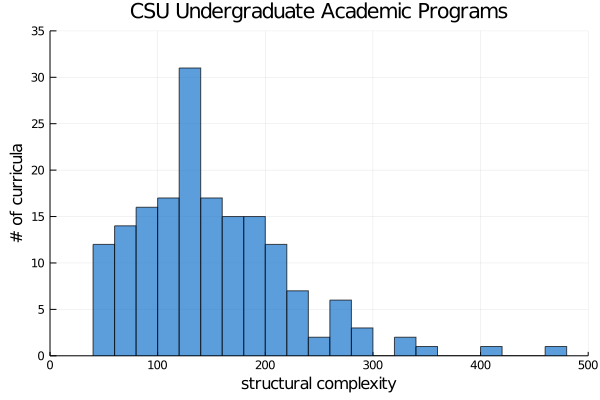

In [8]:
metric_histogram(curricula, "complexity", title="CSU Undergraduate Academic Programs", xlabel="structural complexity", 
       ylabel="# of curricula", nbins = 20, xlim=(0,500), ylim=(0,35))

The `show_homology()` function creates a visualization that allows you to visualize how close one program is to another, i.e., the extent to which they share the same courses.

In [14]:
curricula = Array{Curriculum,1}()
for plan in values(degree_plans)
    push!(curricula, plan.curriculum)
end
plotlyjs();
show_homology(curricula)

LoadError: UndefVarError: I not defined

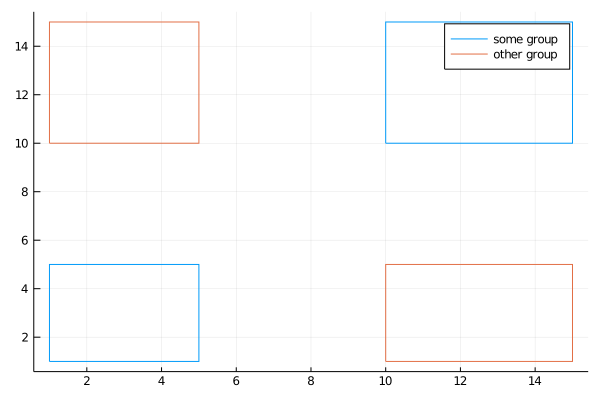

In [8]:
using PlotlyJS
Plots.PlotlyJSBackend()
function rectangle_from_coords(xb,yb,xt,yt)
    [
        xb yb
        xt yb
        xt yt
        xb yt
        xb yb
        NaN NaN
    ]
end

some_rects=[
    rectangle_from_coords(1 ,1 ,5 ,5 )
    rectangle_from_coords(10,10,15,15)
    ]
other_rects=[
    rectangle_from_coords(1 ,10,5 ,15)
    rectangle_from_coords(10,1 ,15,5 )
    ]

Plots.plot(some_rects[:,1], some_rects[:,2],label="some group");
Plots.plot!(other_rects[:,1], other_rects[:,2],label="other group")